<a href="https://colab.research.google.com/github/DestonSJU/IDS/blob/main//HW5/HW5_Extra_Credit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. First I went through each section of the linear_regression_Python.ipynb file and converted the methods to R the best that I could.

I read the Company_data.csv file and use it to create the companyDF dataframe. In order to import the data I had to upload the Company_data.csv file to the session storage before I could read it and create a dataframe.

In [1]:
#Import data and create dataframe
data <- read.csv("Company_data.csv")
companyDF <- data

I display the first 10 rows of the dataframe.

In [2]:
#Displays first 10 rows of companyDF
head(companyDF, 10)

,TV,Radio,Newspaper,Sales
,<dbl>,<dbl>,<dbl>,<dbl>
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,12.0
4,151.5,41.3,58.5,16.5
5,180.8,10.8,58.4,17.9
6,8.7,48.9,75.0,7.2
7,57.5,32.8,23.5,11.8
8,120.2,19.6,11.6,13.2
9,8.6,2.1,1.0,4.8


I display the summary of the data which contains the min, max, median, mean, and quartiles for each of the attributes.**bold text**

In [3]:
#Displays the summary of companyDF
summary(companyDF)

       TV             Radio          Newspaper          Sales      
 Min.   :  0.70   Min.   : 0.000   Min.   :  0.30   Min.   : 1.60  
 1st Qu.: 74.38   1st Qu.: 9.975   1st Qu.: 12.75   1st Qu.:11.00  
 Median :149.75   Median :22.900   Median : 25.75   Median :16.00  
 Mean   :147.04   Mean   :23.264   Mean   : 30.55   Mean   :15.13  
 3rd Qu.:218.82   3rd Qu.:36.525   3rd Qu.: 45.10   3rd Qu.:19.05  
 Max.   :296.40   Max.   :49.600   Max.   :114.00   Max.   :27.00  

I Calculate the r for each attribute as the independent variable with Sales being the dependent variable. For Sales as the indepent variable r is 1, for TV it is 0.901, for Radio it is 0.350, and for Newspaper it is 0.158.

In [4]:
#Calculates and displays r for each of the attributes with sales as the dependent variable
rSales <- cor(companyDF$Sales, companyDF$Sales, method = "pearson")
print(rSales)
rTV <- cor(companyDF$TV, companyDF$Sales, method = "pearson")
print(rTV)
rRadio <- cor(companyDF$Radio, companyDF$Sales, method = "pearson")
print(rRadio)
rNewspaper <- cor(companyDF$Newspaper, companyDF$Sales, method = "pearson")
print(rNewspaper)

[1] 1
[1] 0.9012079
[1] 0.3496311
[1] 0.15796


I create the boxplot for companyDF which has a separate boxplot for each attribute

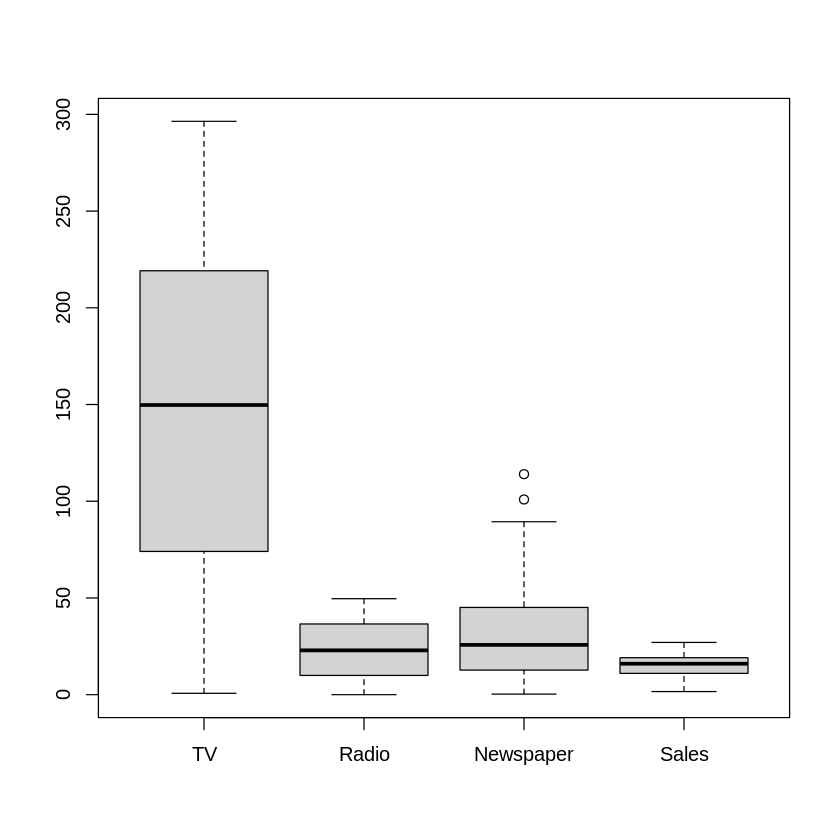

In [5]:
#Creates and displays boxplot for companyDF
boxplot(companyDF, data = companyDF)

I create the histogram and density plots for each of the attributes of companyDF

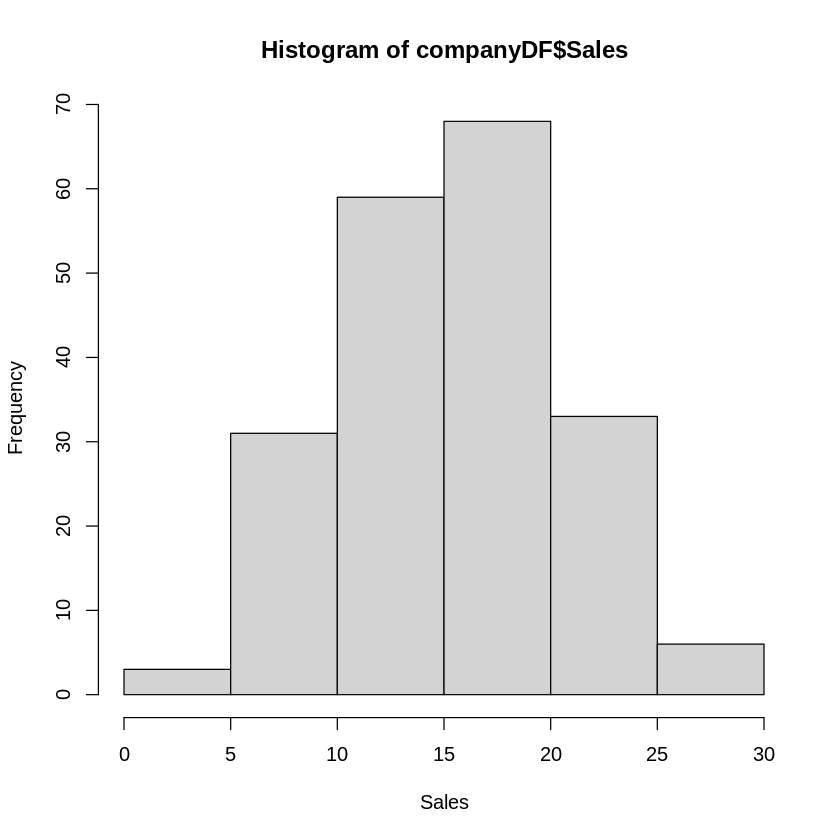

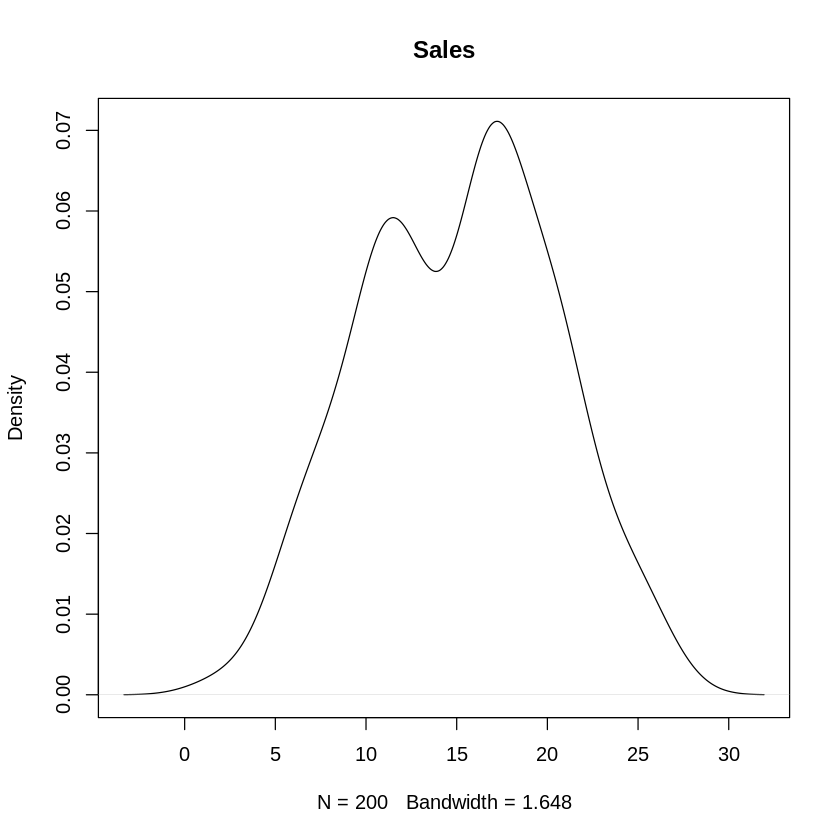

In [6]:
#Creates and displays the histogram and density plot for Sales
hist(companyDF$Sales, xlab = "Sales")
d1 <- density(companyDF$Sales)
plot(d1, main = "Sales")

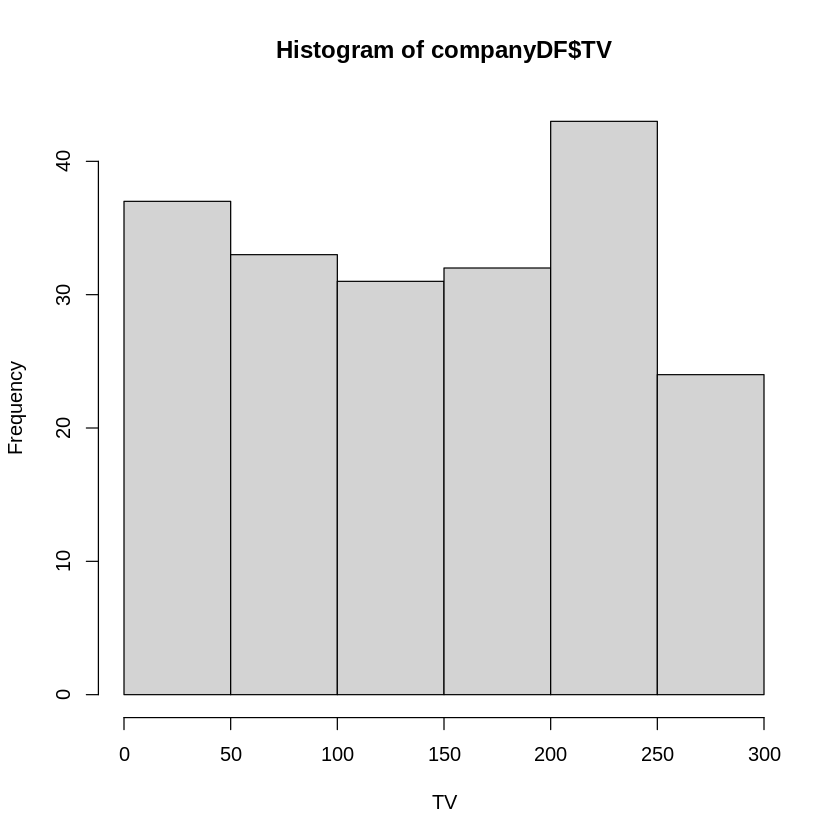

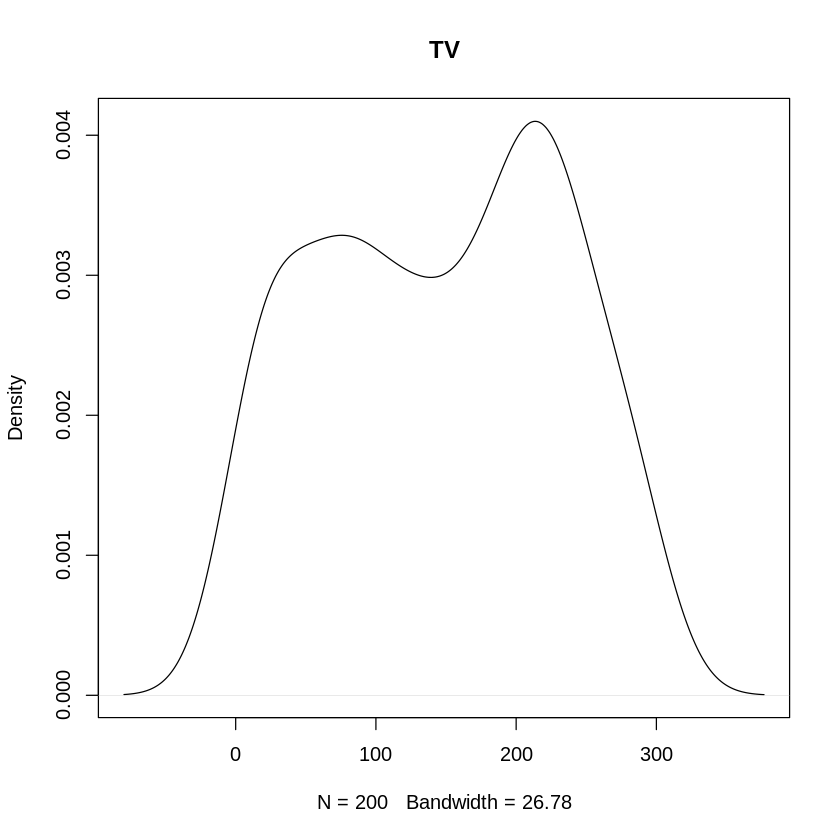

In [7]:
#Creates and displays the histogram and density plot for TV
hist(companyDF$TV, xlab = "TV")
d1 <- density(companyDF$TV)
plot(d1, main = "TV")

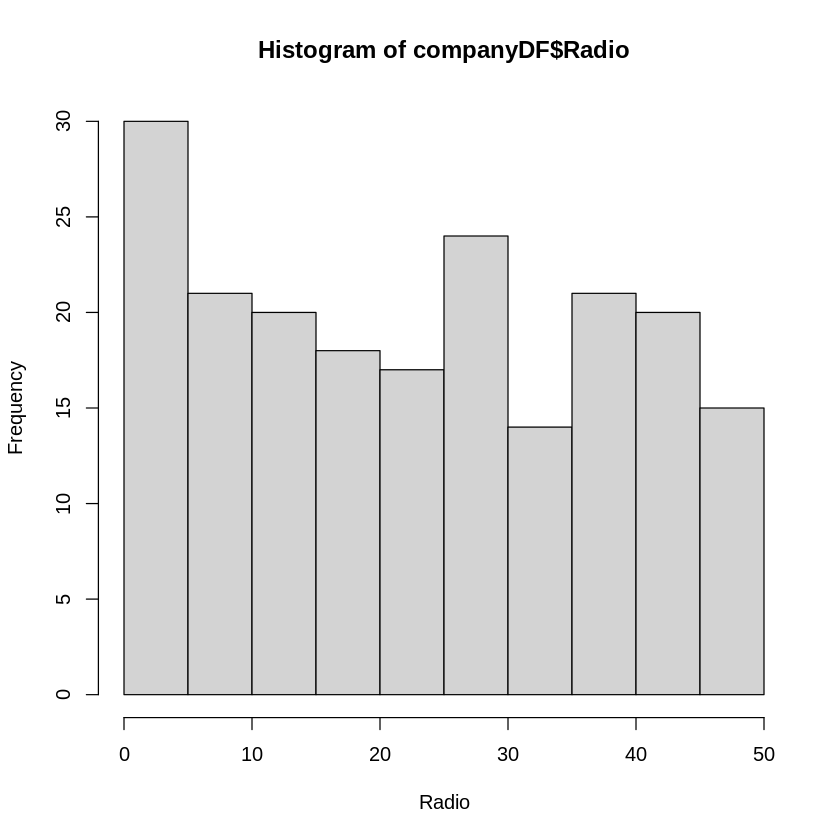

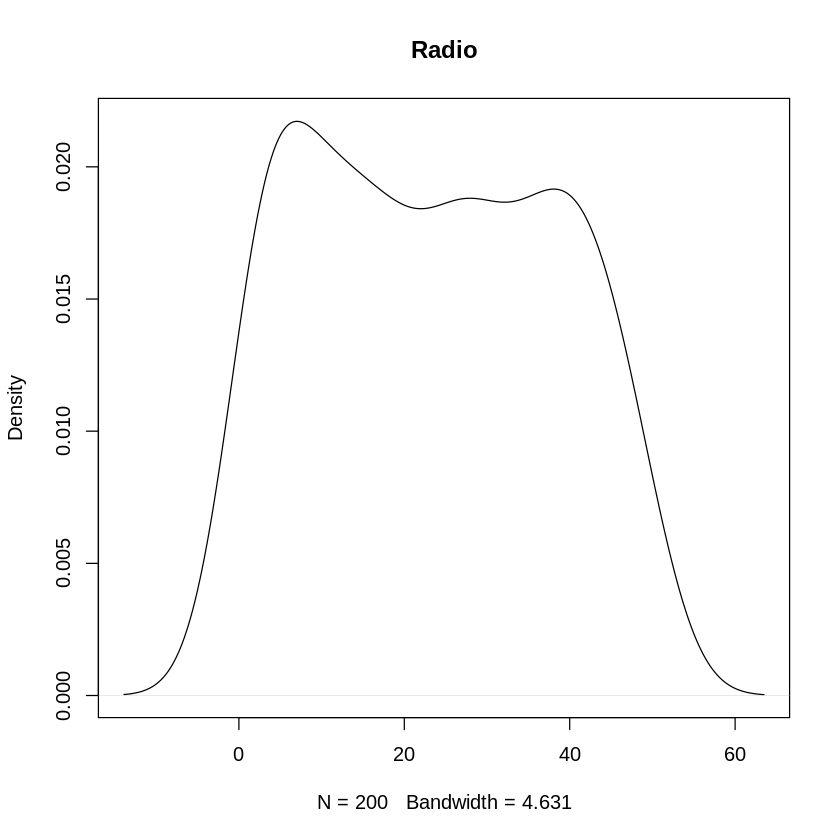

In [8]:
#Creates and displays the histogram and density plot for Radio
hist(companyDF$Radio, xlab = "Radio")
d1 <- density(companyDF$Radio)
plot(d1, main = "Radio")

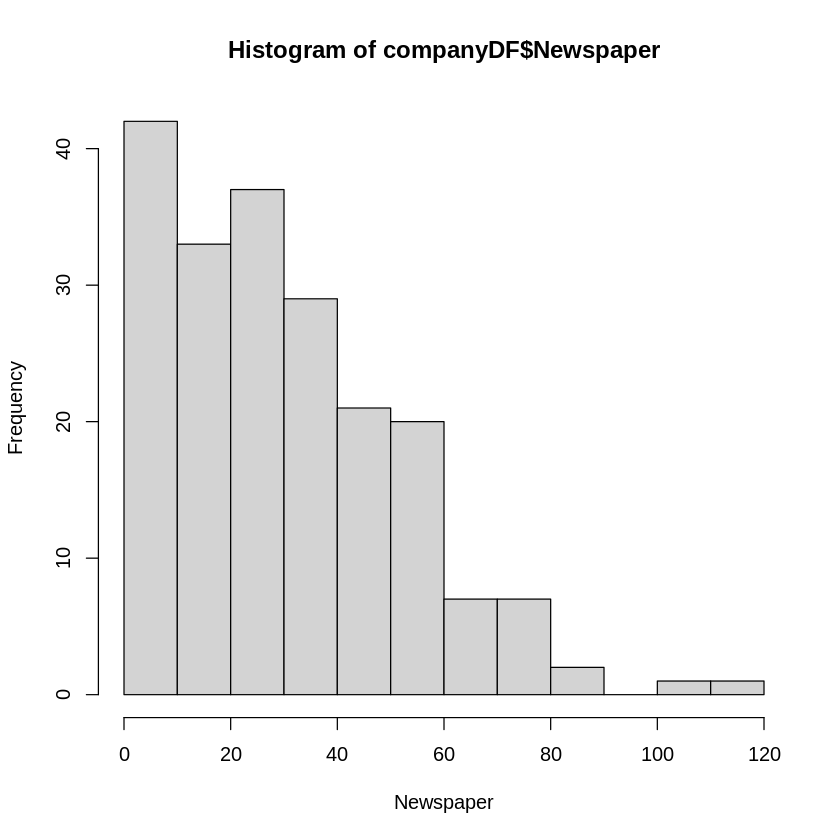

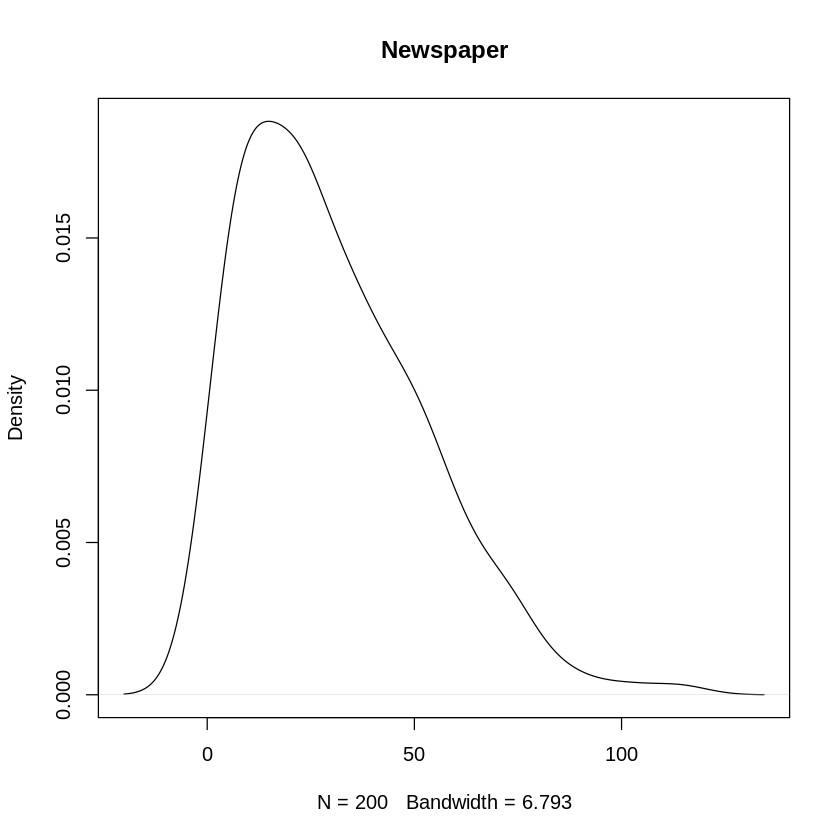

In [9]:
#Creates and displays the histogram and density plot for Newspaper
hist(companyDF$Newspaper, xlab = "Newspaper")
d1 <- density(companyDF$Newspaper)
plot(d1, main = "Newspaper")

I check for missing values by finding the amount of missing values in the dataframe.

In [10]:
#Prints sum of missing values
print(sum(is.na(companyDF)))

[1] 0


I create and display the plots with TV, Radio, and Newspaper as the independent variable respectively and Sales as the dependent variable.

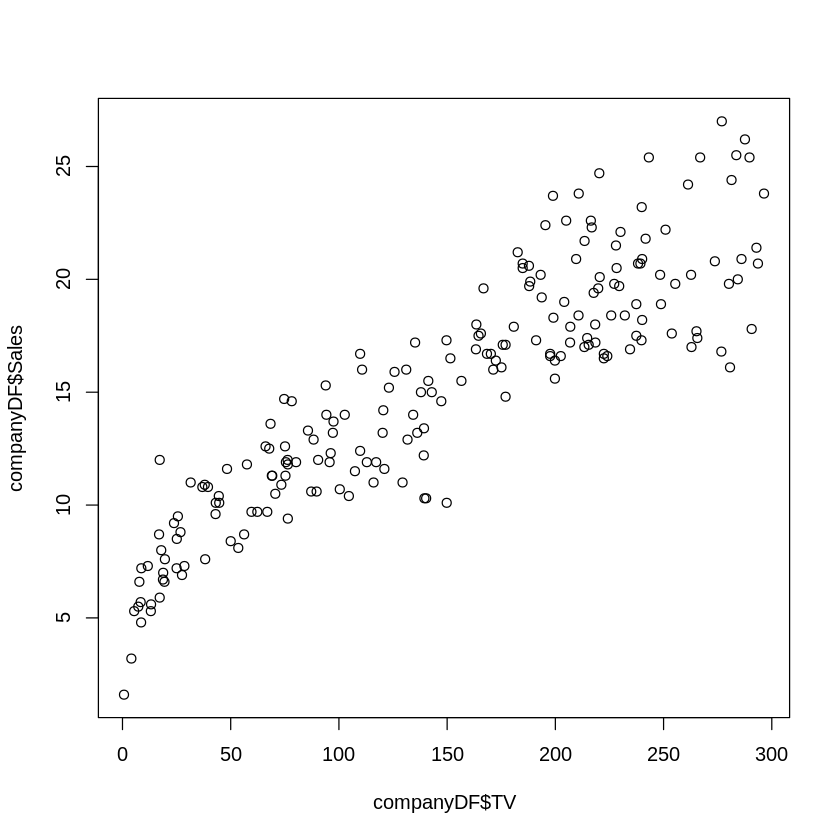

In [11]:
#Displays the plot with TV as x and Sales for y
plot(companyDF$TV, companyDF$Sales)

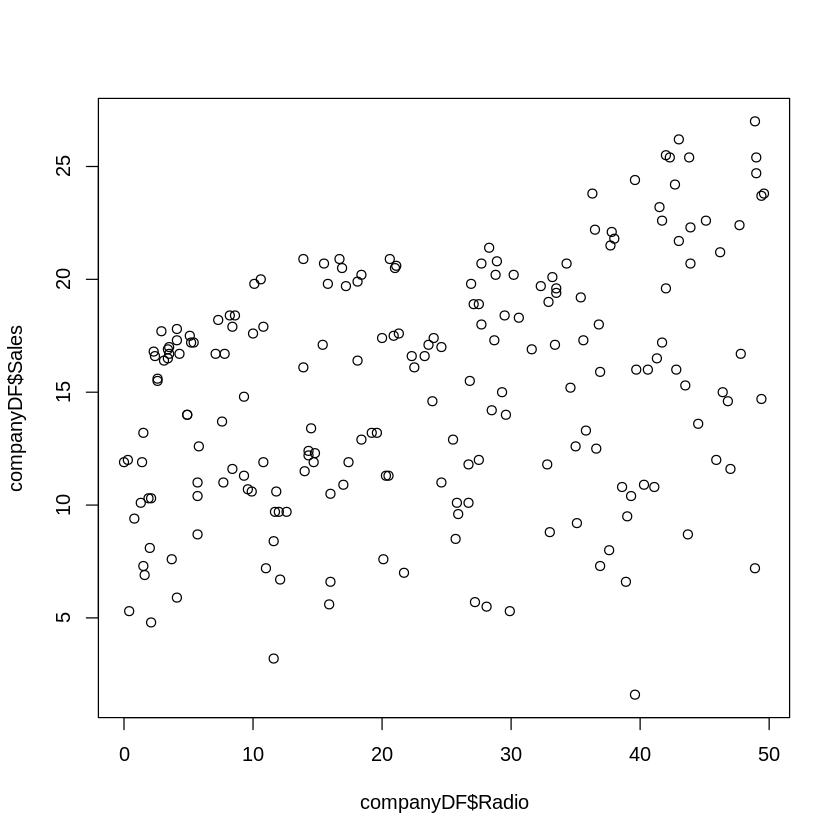

In [12]:
#Displays the plot with Radio as x and Sales for y
plot(companyDF$Radio, companyDF$Sales)

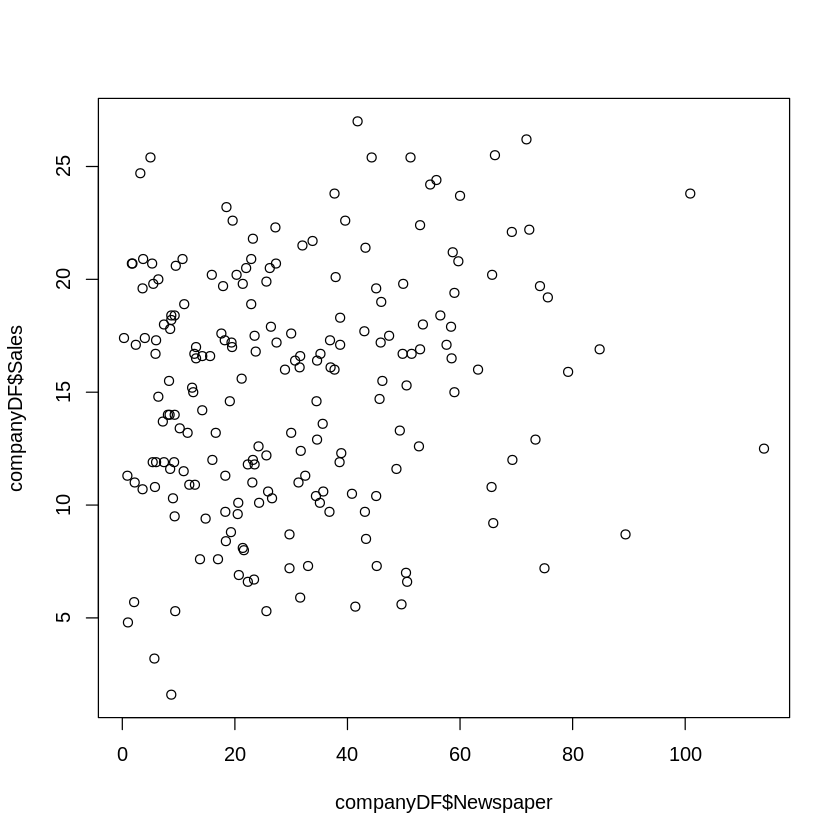

In [13]:
#Displays the plot with Newspaper as x and Sales for y
plot(companyDF$Newspaper, companyDF$Sales)

I create the linear regression model with TV as the independent variable and Sales as the dependent variable. I then display the summary and find the slope to be 0.05 and the intercept to be 6.97. This makes the equation for the linear regression line, Sales = 0.05 * TV + 6.97.

In [14]:
#Creates and displays the summary of the linear regression model for TV as the indpendent variable and Sales as the dependent variable
TVModel <- lm(Sales ~ TV, data = companyDF)
summary(TVModel)


Call:
lm(formula = Sales ~ TV, data = companyDF)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.4438 -1.4857  0.0218  1.5042  5.6932 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 6.974821   0.322553   21.62   <2e-16 ***
TV          0.055465   0.001896   29.26   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.296 on 198 degrees of freedom
Multiple R-squared:  0.8122,	Adjusted R-squared:  0.8112 
F-statistic: 856.2 on 1 and 198 DF,  p-value: < 2.2e-16


I find the R squared value of the linear regression model to be 0.812 and the mean squared error to be 5.22.

In [15]:
#Predicts the sales values based on the model and finds and prints the R squared and mean squared error
predictedSales <- predict(TVModel, companyDF)
print(1-sum(((companyDF$Sales - predictedSales)^2) / sum((companyDF$Sales - mean(companyDF$Sales))^2)))
print(sum((companyDF$Sales - predictedSales)^2) / nrow(companyDF))

[1] 0.8121757
[1] 5.217744


I split the dataframe into 70% training data and 30% testing data. Note: while the seed is 100 like the python implementation, they do no produce the same values.

In [16]:
#Sets random seed to 100
set.seed(100)
#Splits the data by putting 70% into trainingCompanyDF and the other 30% into testingCompanyDF
data <- sample(c(TRUE,FALSE), nrow(companyDF),
                 replace=TRUE, prob=c(0.7,0.3))

trainingCompanyDF  <- companyDF[data, ]

testingCompanyDF  <- companyDF[!data, ]

#Displays number of rows for trainingCompanyDF and testingCompanyDF
nrow(trainingCompanyDF)
nrow(testingCompanyDF)

[1] 140

[1] 60

I create another linear regression model but this time just use the training data instead of all of the data. I then display the summary and find the slope to be 0.06 and the intercept to be 7.04. This makes the linear regression equation, Sales = 0.06 * TV + 7.04.

In [17]:
#Creates and displays the summary for a linear regression model with the training data for companyDF
trainingTVModel <- lm(Sales ~ TV, data = trainingCompanyDF)
summary(trainingTVModel)


Call:
lm(formula = Sales ~ TV, data = trainingCompanyDF)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.0033 -1.6362  0.0164  1.5880  5.2787 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 7.037029   0.384893   18.28   <2e-16 ***
TV          0.057236   0.002244   25.50   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.283 on 138 degrees of freedom
Multiple R-squared:  0.825,	Adjusted R-squared:  0.8237 
F-statistic: 650.4 on 1 and 138 DF,  p-value: < 2.2e-16


I use the trainingTVModel that i created before to predict the sales for the testCompanyDF. After that I find that the R squared is 0.745 and the mean squared error is 5.82.

In [18]:
#Predicts the sales values for the test data based on the model with training data and finds and prints the R squared and mean squared error
predictedSales <- predict(trainingTVModel, testingCompanyDF)
print(1-sum(((testingCompanyDF$Sales - predictedSales)^2) / sum((testingCompanyDF$Sales - mean(testingCompanyDF$Sales))^2)))
print(sum((testingCompanyDF$Sales - predictedSales)^2) / nrow(testingCompanyDF))

[1] 0.7450372
[1] 5.823391


I create a plot with TV as x and Sales as y and display the plot with the linear regression lines for the TVModel and the trainingTVModel.

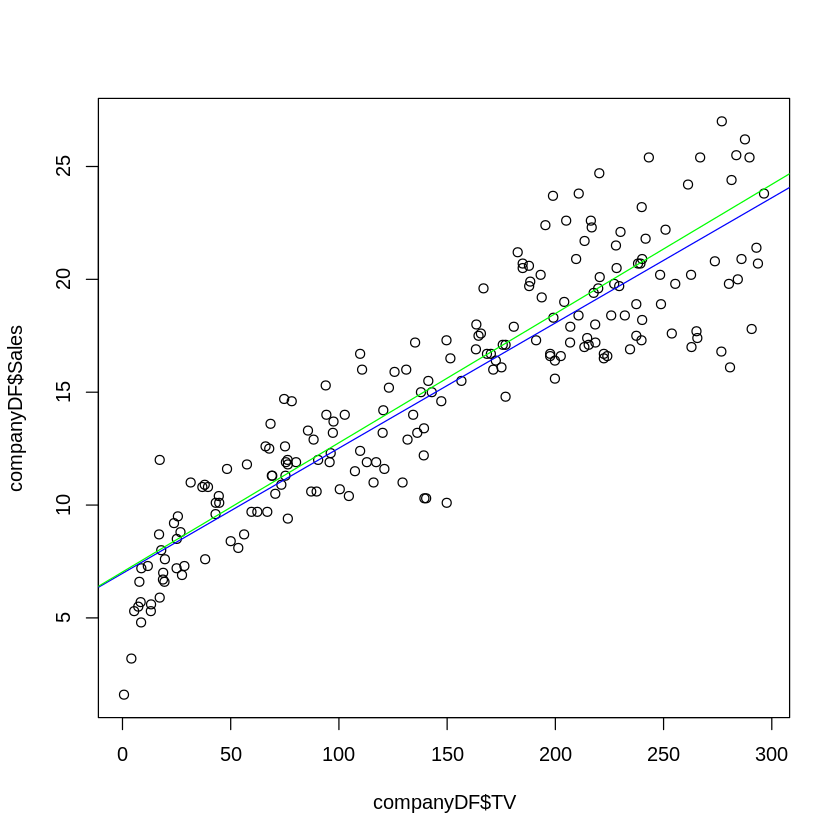

In [19]:
#Displays a plot with TV as x and Sales as y with the linear regression lines for TVModel and trainingTVModel
plot(companyDF$TV, companyDF$Sales)
abline(TVModel, col = "blue")
abline(trainingTVModel, col = "green")

2a. I create the linear regression model with TV as the independent variable and Sales as the dependent variable. I find the R squared to be 0.812 and the mean squared error to be 5.22. After that I display a plot with TV as x and Sales as y and display the linear regression line as well.

[1] 0.8121757
[1] 5.217744


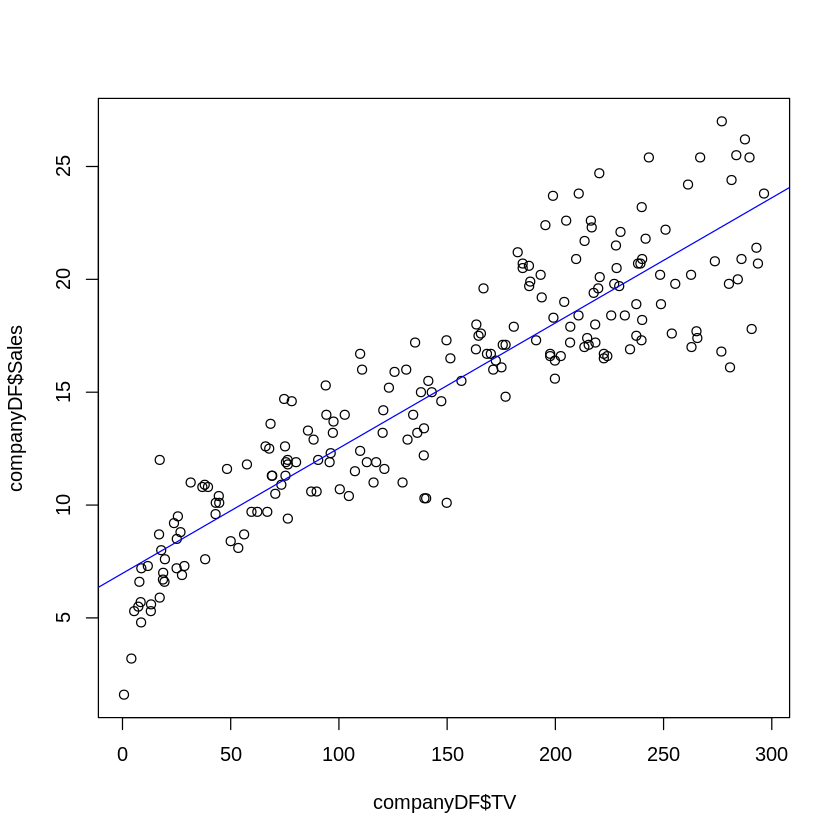

In [20]:
#Creates the linear regression model for TV as the indpendent variable and Sales as the dependent variable
TVModel <- lm(Sales ~ TV, data = companyDF)

#Predicts the sales values based on the model and finds and prints the R squared and mean squared error
predictedSales <- predict(TVModel, companyDF)
print(1-sum(((companyDF$Sales - predictedSales)^2) / sum((companyDF$Sales - mean(companyDF$Sales))^2)))
print(sum((companyDF$Sales - predictedSales)^2) / nrow(companyDF))

#Displays a plot with TV as x and Sales as y with the linear regression line for TVModel
plot(companyDF$TV, companyDF$Sales)
abline(TVModel, col = "blue")

2b.  I create the linear regression model with TV, Radio, and Newspaper as independent variables and Sales as the dependent variable. I find the R squared to be 0.903 and the mean squared error to be 2.71. After that I display a plot with TV, Radio, and Newspaper as x and Sales as y and display the linear regression line as well.

[1] 0.9025913
[1] 2.706006


Warning message in abline(dataModel, col = "blue"):
“only using the first two of 4 regression coefficients”


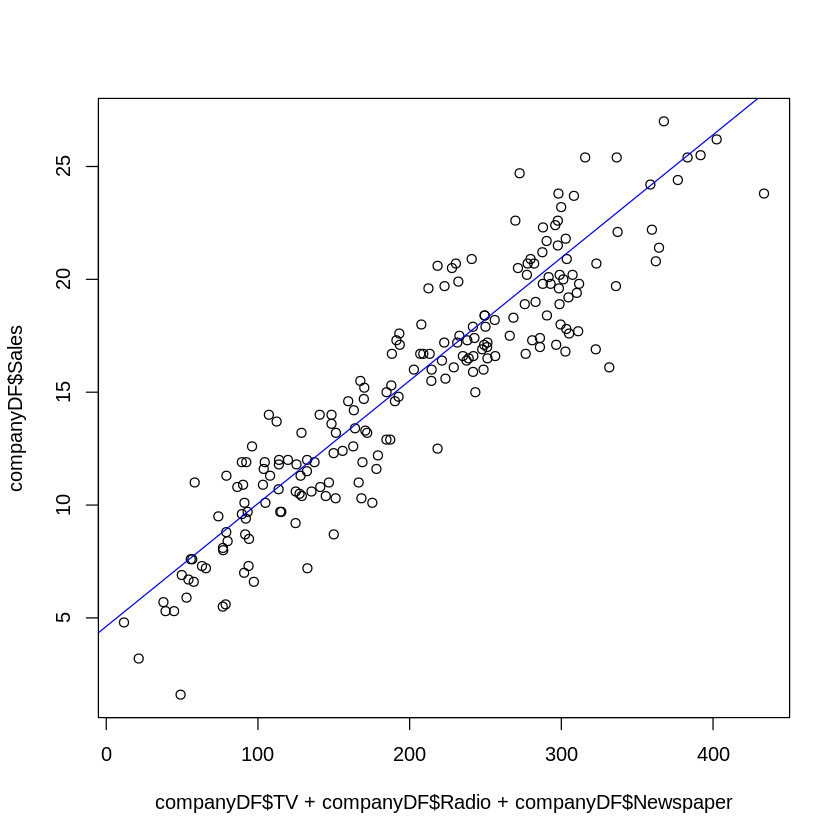

In [21]:
#Creates the linear regression model for TV, Radio, and Newspaper as indpendent variables and Sales as the dependent variable
dataModel <- lm(Sales ~ TV + Radio + Newspaper, data = companyDF)

#Predicts the sales values based on the model and finds and prints the R squared and mean squared error
predictedSales <- predict(dataModel, companyDF)
print(1-sum(((companyDF$Sales - predictedSales)^2) / sum((companyDF$Sales - mean(companyDF$Sales))^2)))
print(sum((companyDF$Sales - predictedSales)^2) / nrow(companyDF))

#Displays a plot with TV, Radio, and Newspaper as x and Sales as y with the linear regression line for dataModel
plot(companyDF$TV + companyDF$Radio + companyDF$Newspaper, companyDF$Sales)
abline(dataModel, col = "blue")

3. Summary: First I read the Company_data.csv file and create the CompanyDF dataframe and display the first 10 rows of it. Next I display the summary of the data which contains the min, max, median, mean, and quartiles for each of the attributes. I then calculate the r for each of the attributes with Sales as the dependent variable. For Sales as the indepent variable r is 1, for TV it is 0.901, for Radio it is 0.350, and for Newspaper it is 0.158. After that I create and display the boxplots of each of the attributes, as well as the plots, histograms, and density plots for TV, Radio, and Newspaper as independent variables respectively and Sales as the dependent variable. I also check for missing values and find that there are none. Next I create the linear regression model with TV as the independent variable and Sales as the dependent variable. I then display the summary and find the slope to be 0.05 and the intercept to be 6.97, making the equation for the linear regression line, Sales = 0.05 * TV + 6.97. I also find the R squared value of the linear regression model (0.812) and the mean squared error (5.22). After this I split create two more dataframes, one for the the training data and one for the testing data. The ration of training to testing is 70-30. I create another linear regression model but this time just use the training data instead of all of the data. I then display the summary and find the slope to be 0.06 and the intercept to be 7.04. making the linear regression equation, Sales = 0.06 * TV + 7.04. I then use the trainingTVModel to predict the sales for the testing data. After that I find the R squared (0.745) and the mean squared error (5.82). I then create a plot with TV as x and Sales as y and display the plot with the linear regression lines for the TVModel and the trainingTVModel. For question 2 I first repeat the steps I did previously to create the TVModel and find the R squared (0.812) and mean squared error (5.22). Then I create the linear regression model with TV, Radio, and Newspaper as independent variables and Sales as the dependent variable. I find the R squared (0.903) and the mean squared error (2.71). After that I display a plot with TV, Radio, and Newspaper as x and Sales as y and display the linear regression line of the model as well.